# ADR Report Pattern Analysis
This notebook explores trends and patterns in Adverse Drug Reaction (ADR) reports using synthetic data.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sample_adr_data.csv')
df.head()


,Report_ID,Patient_Age,Gender,Suspected_Drug,Reaction_Description,Report_Date,Outcome,Country
0,RPT1000,61,Male,Omeprazole,Insomnia,2020-09-29,Recovered,South Africa
1,RPT1001,24,Other,Ibuprofen,Headache,2021-01-11,Hospitalization,Japan
2,RPT1002,81,Male,Lisinopril,Fever,2024-03-20,Unknown,Brazil
3,RPT1003,70,Male,Ibuprofen,Insomnia,2025-01-19,Hospitalization,Germany
4,RPT1004,30,Female,Ciprofloxacin,Allergic reaction,2022-01-19,Not Recovered,UK


In [2]:
# Basic dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Report_ID             500 non-null    object
 1   Patient_Age           500 non-null    int64 
 2   Gender                500 non-null    object
 3   Suspected_Drug        500 non-null    object
 4   Reaction_Description  500 non-null    object
 5   Report_Date           500 non-null    object
 6   Outcome               500 non-null    object
 7   Country               500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


Report_ID               0
Patient_Age             0
Gender                  0
Suspected_Drug          0
Reaction_Description    0
Report_Date             0
Outcome                 0
Country                 0
dtype: int64

C:\Users\sudip\AppData\Local\Temp\ipykernel_19824\1407607046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='Blues_d')


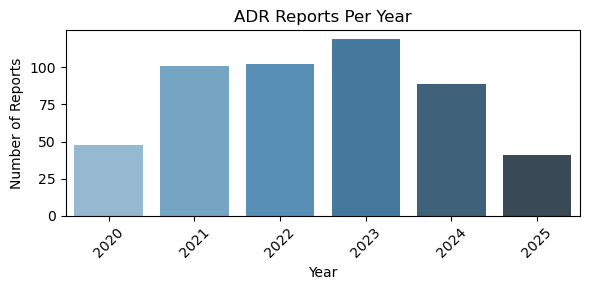

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Report_Date' to datetime
df['Report_Date'] = pd.to_datetime(df['Report_Date'])

# Create 'Year' and 'Month' columns
df['Year'] = df['Report_Date'].dt.year
df['Month'] = df['Report_Date'].dt.month

# ADR reports per year
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Year', palette='Blues_d')
plt.title('ADR Reports Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


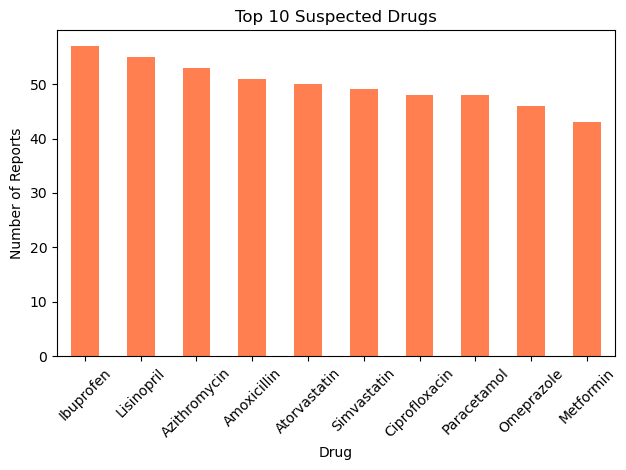

In [7]:
# Top 10 drugs associated with ADRs
top_drugs = df['Suspected_Drug'].value_counts().head(10)
top_drugs.plot(kind='bar', color='coral', title='Top 10 Suspected Drugs')
plt.ylabel('Number of Reports')
plt.xlabel('Drug')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sudip\AppData\Local\Temp\ipykernel_19824\2490624617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


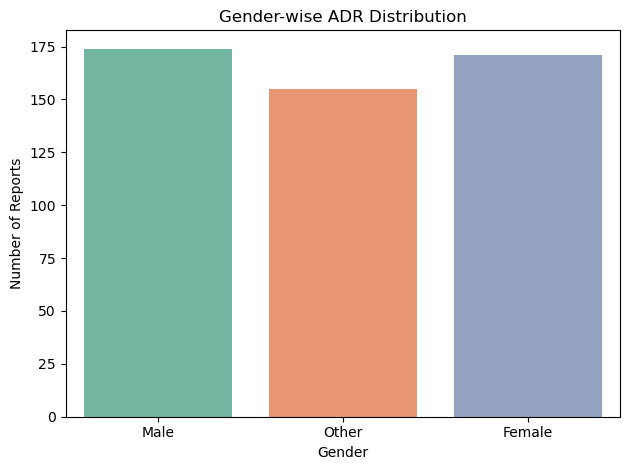

In [9]:
# Gender-wise distribution of ADR reports
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender-wise ADR Distribution')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()


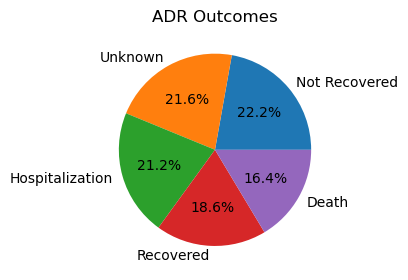

In [23]:
# Outcome distribution
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='ADR Outcomes')
plt.ylabel('')
plt.tight_layout()
plt.show()


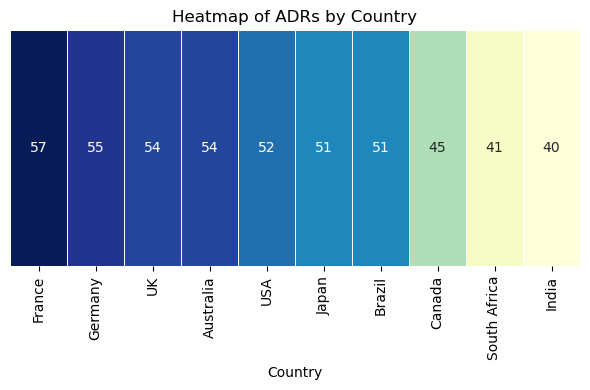

In [19]:
country_counts = df['Country'].value_counts().sort_values(ascending=False)
country_df = pd.DataFrame({'Country': country_counts.index, 'ADR_Count': country_counts.values})
country_df.set_index('Country', inplace=True)
plt.figure(figsize=(6, 4))
sns.heatmap(country_df.T, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5, cbar=False)
plt.title('Heatmap of ADRs by Country')
plt.yticks([])
plt.xlabel('Country')
plt.tight_layout()
plt.show()